# MTurk Similarity Comparison Results

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
df = pd.read_csv('~/Downloads/Batch_3580188_batch_results.csv')
df = pd.read_csv('~/Downloads/Batch_3580708_batch_results.csv')

In [4]:
print('Average worker time was {:.2f} minutes'.format(np.mean(df['WorkTimeInSeconds']) / 60))

Average worker time was 7.64 minutes


In [5]:
pattern_sizes = 3
pattern_sizes_names = ['3 kb', '12 kb', '120 kb']
pattern_sizes_shortnames = ['3kb', '12kb', '120kb']
comparisons = 9
techniques = 7
technique_options = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
technique_names = ['CAE', 'PAA/ED', 'SAX', 'DTW', 'UMAP', 'TSFRESH', 'XCORR']
options = 2
option_names = ['most', 'second most']

## Aggregate results

In [38]:
results_3kb = []
results_12kb = []
results_120kb = []

results = [results_3kb, results_12kb, results_120kb]

rows_3kb = np.where(df['Input.T0A'].str.contains('3KB', regex=False).values)[0]
rows_12kb = np.where(df['Input.T0A'].str.contains('12KB', regex=False).values)[0]
rows_120kb = np.where(df['Input.T0A'].str.contains('120KB', regex=False).values)[0]

for c in np.arange(comparisons):
    c_res_3kb = []
    c_res_12kb = []
    c_res_120kb = []
    for o in np.arange(options):
        o_res_3kb = []
        o_res_12kb = []
        o_res_120kb = []
        for t in technique_options:
            counts = df['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)].value_counts()
            try:
                o_res_3kb.append(df['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_3kb].value_counts().loc[True])
            except KeyError:
                o_res_3kb.append(0)
            try:
                o_res_12kb.append(df['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_12kb].value_counts().loc[True])
            except KeyError:
                o_res_12kb.append(0)
            try:
                o_res_120kb.append(df['Answer.T{}{}{}.{}'.format(str(c), str(o + 1), t, t)][rows_120kb].value_counts().loc[True])
            except KeyError:
                o_res_120kb.append(0)
        c_res_3kb.append(o_res_3kb)
        c_res_12kb.append(o_res_12kb)
        c_res_120kb.append(o_res_120kb)
    results_3kb.append(c_res_3kb)
    results_12kb.append(c_res_12kb)
    results_120kb.append(c_res_120kb)

In [45]:
results

[[[[6, 12, 0, 3, 2, 1, 1], [7, 2, 3, 5, 7, 0, 1]],
  [[5, 8, 0, 0, 6, 0, 6], [4, 7, 4, 1, 5, 0, 4]],
  [[1, 4, 5, 0, 15, 0, 0], [5, 7, 6, 1, 6, 0, 0]],
  [[13, 1, 1, 9, 1, 0, 0], [7, 0, 5, 8, 0, 0, 5]],
  [[7, 7, 8, 1, 2, 0, 0], [6, 5, 3, 2, 8, 0, 1]],
  [[11, 3, 6, 1, 3, 0, 1], [8, 6, 6, 1, 4, 0, 0]],
  [[15, 8, 1, 0, 0, 0, 1], [7, 12, 3, 2, 1, 0, 0]],
  [[12, 8, 0, 0, 0, 2, 3], [8, 11, 0, 1, 2, 0, 3]],
  [[4, 6, 14, 0, 1, 0, 0], [9, 5, 6, 1, 3, 0, 1]]],
 [[[22, 1, 1, 0, 1, 0, 0], [0, 10, 1, 6, 8, 0, 0]],
  [[10, 6, 4, 0, 4, 0, 1], [4, 8, 2, 3, 6, 0, 2]],
  [[6, 9, 0, 9, 1, 0, 0], [7, 6, 0, 8, 4, 0, 0]],
  [[5, 10, 0, 0, 0, 1, 9], [8, 8, 3, 0, 1, 1, 4]],
  [[7, 8, 9, 0, 1, 0, 0], [3, 7, 8, 4, 3, 0, 0]],
  [[19, 4, 0, 0, 2, 0, 0], [3, 6, 4, 4, 6, 0, 2]],
  [[6, 19, 0, 0, 0, 0, 0], [14, 5, 6, 0, 0, 0, 0]],
  [[6, 8, 7, 2, 2, 0, 0], [5, 10, 5, 2, 3, 0, 0]],
  [[15, 5, 0, 5, 0, 0, 0], [6, 6, 2, 5, 3, 2, 1]]],
 [[[17, 3, 0, 1, 1, 0, 3], [4, 3, 1, 10, 1, 3, 3]],
  [[17, 3, 2, 3, 0, 0, 0], [

## Results

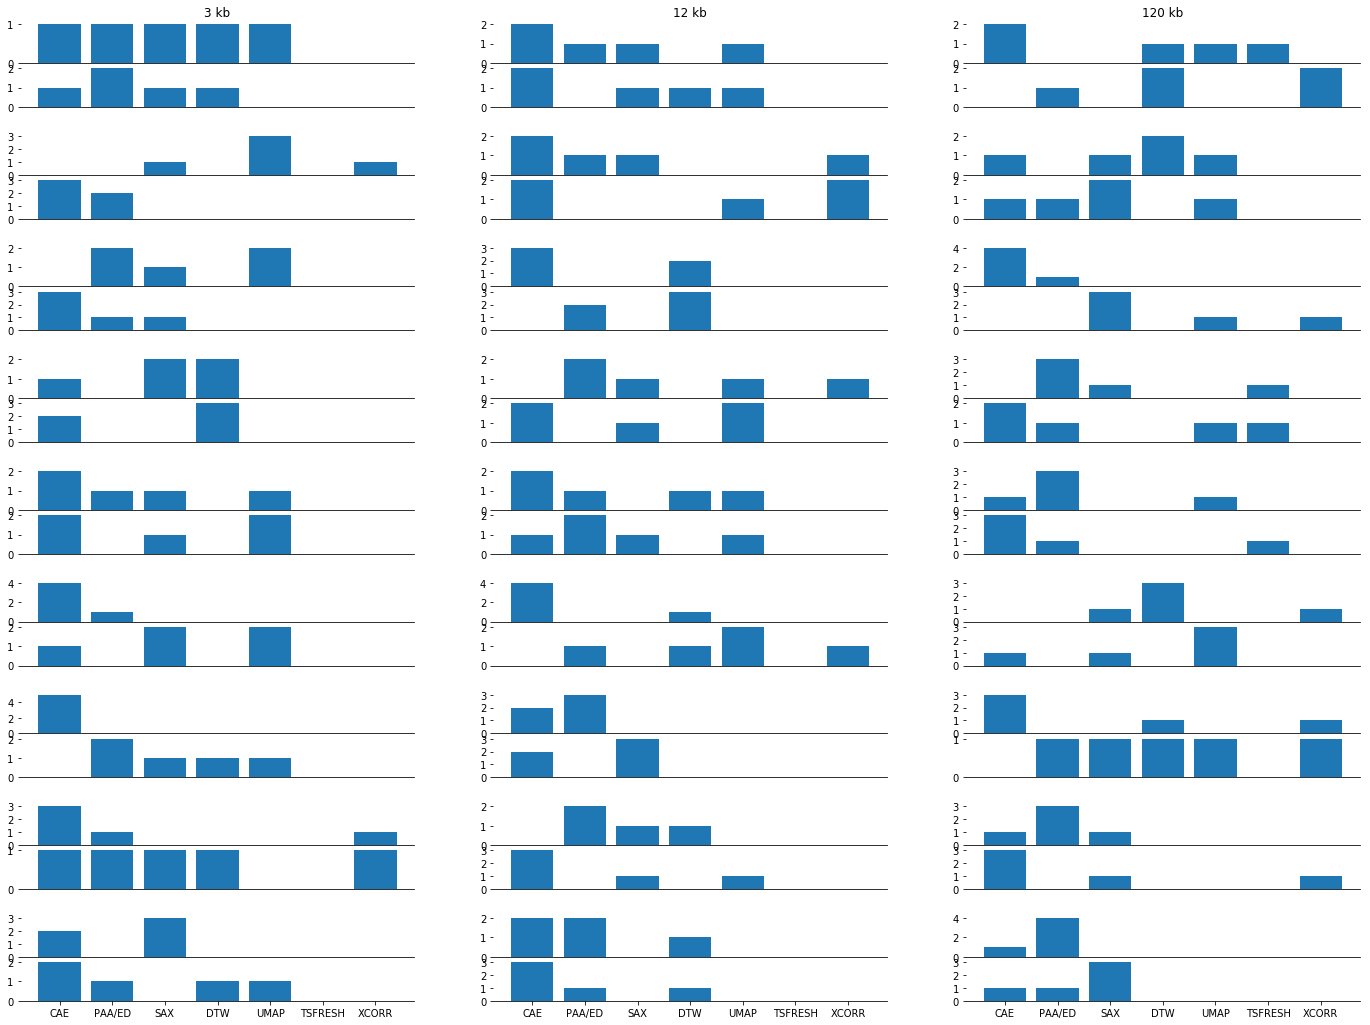

In [108]:
import math

fig, ax = plt.subplots(
    nrows=comparisons * (options + 1) - 1,
    ncols=pattern_sizes,
    figsize=(8 * pattern_sizes, comparisons * options),
    sharex=True,
    gridspec_kw=dict(height_ratios=([1,1,0.5] * (comparisons - 1) + [1,1]), hspace=0.1)
)

for c in range(comparisons):
    for o in range(options):
        for s in range(pattern_sizes):
            res = results[s][c][o]
            ax[c * 3 + o, s].bar(technique_names, res)
            ax[c * 3 + o, s].set_yticks(range(min(res), max(res) + 1, max(1, math.floor(max(res) / 2))))
            if c == 0 and o == 0:
                ax[c * 3 + o, s].set_title(pattern_sizes_names[s])
            if c < (comparisons - 1) or o != 1:
                ax[c * 3 + o, s].tick_params(axis='x', length=0)
            ax[c * 3 + o, s].spines['top'].set_visible(False)
            ax[c * 3 + o, s].spines['left'].set_visible(False)
            ax[c * 3 + o, s].spines['right'].set_visible(False)
        
    if c < comparisons - 1:
        for s in range(pattern_sizes):
            ax[c * 3 + 2, s].set_xticks([], [])
            ax[c * 3 + 2, s].set_yticks([], [])
            ax[c * 3 + 2, s].tick_params(axis='x', length=0)
            ax[c * 3 + 2, s].spines['top'].set_visible(False)
            ax[c * 3 + 2, s].spines['right'].set_visible(False)
            ax[c * 3 + 2, s].spines['bottom'].set_visible(False)
            ax[c * 3 + 2, s].spines['left'].set_visible(False)

## Most and second most combined

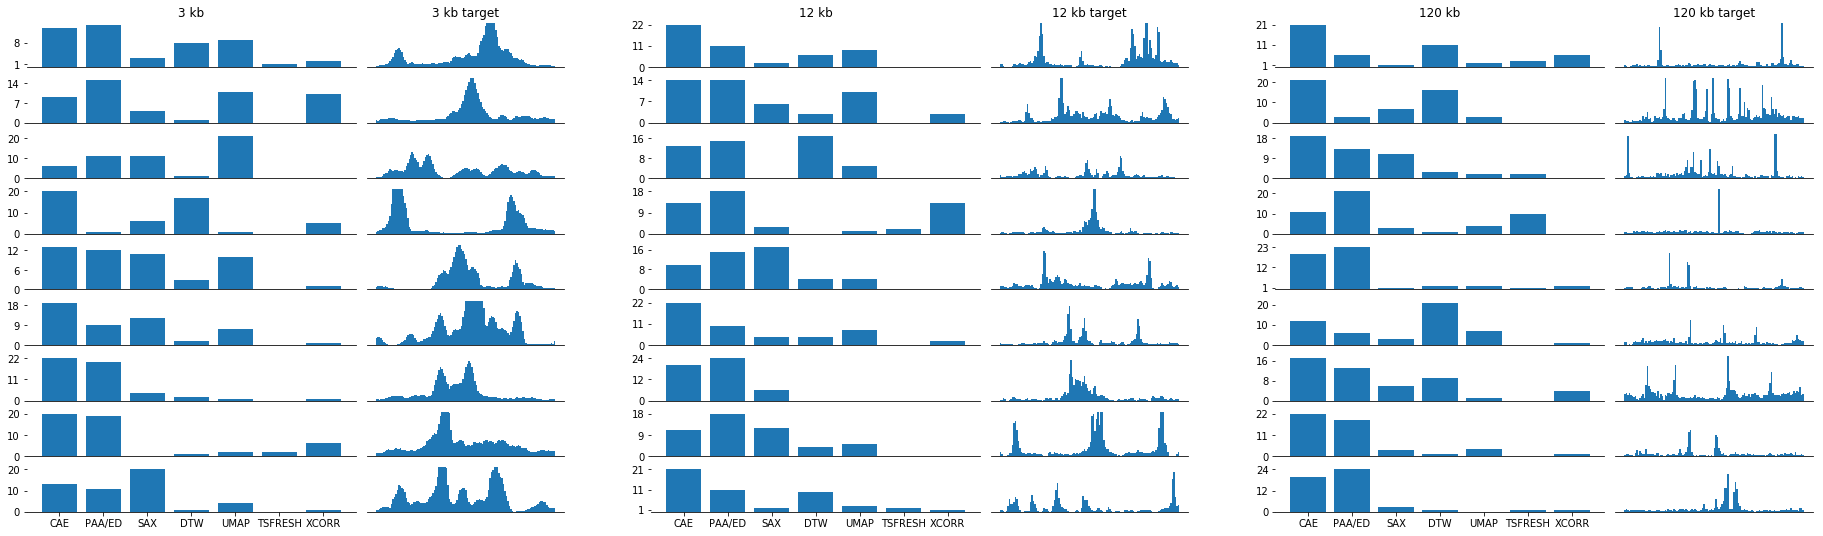

In [39]:
import h5py
import math

fig, ax = plt.subplots(
    nrows=comparisons,
    ncols=pattern_sizes * 3 - 1,
    figsize=(8 * (pattern_sizes + 1), comparisons),
    gridspec_kw=dict(width_ratios=([1,0.6,0.2] * (pattern_sizes - 1) + [1,0.6]), wspace=0.05, hspace=0.25)
)

with h5py.File('data/search-targets.h5', 'r') as f:
    for c in range(comparisons):
        for s in range(pattern_sizes):
            res = [x + results[s][c][1][i] for i, x in enumerate(results[s][c][0])]
            ax[c, s * 3].bar(technique_names, res)
            ax[c, s * 3].set_yticks(range(min(res), max(res) + 1, max(1, math.floor(max(res) / 2))))
            if c == 0:
                ax[c, s * 3].set_title(pattern_sizes_names[s])
            if c < (comparisons - 1):
                ax[c, s * 3].tick_params(axis='x', length=0)
                ax[c, s * 3].set_xticks([], [])
            ax[c, s * 3].spines['top'].set_visible(False)
            ax[c, s * 3].spines['left'].set_visible(False)
            ax[c, s * 3].spines['right'].set_visible(False)

            target_pattern = f['targets_{}'.format(pattern_sizes_shortnames[s])][c]
            ax[c, s * 3 + 1].bar(np.arange(target_pattern.size), target_pattern, width=1.0)
            ax[c, s * 3 + 1].set_ylim(0, 1)
            ax[c, s * 3 + 1].set_xticks([], [])
            ax[c, s * 3 + 1].set_yticks([], [])
            ax[c, s * 3 + 1].spines['top'].set_visible(False)
            ax[c, s * 3 + 1].spines['left'].set_visible(False)
            ax[c, s * 3 + 1].spines['right'].set_visible(False)
            if c == 0:
                ax[c, s * 3 + 1].set_title('{} target'.format(pattern_sizes_names[s]))
            
            if s < pattern_sizes - 1:
                ax[c, s * 3 + 2].set_xticks([], [])
                ax[c, s * 3 + 2].set_yticks([], [])
                ax[c, s * 3 + 2].spines['top'].set_visible(False)
                ax[c, s * 3 + 2].spines['right'].set_visible(False)
                ax[c, s * 3 + 2].spines['bottom'].set_visible(False)
                ax[c, s * 3 + 2].spines['left'].set_visible(False)

## Post-hoc pairwise comparisons with Holm-Bonferroni-corrected Fisher exact tests

In [55]:
from statsmodels.stats.multitest import multipletests

pairwise_comparisons = [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6]]
pairwise_comparisons_pvalues = []
pairwise_comparisons_pvalues_corrected = []

for s in range(pattern_sizes):
    print('====================')
    print('Size: {}'.format(pattern_sizes_names[s]))
    print('====================')
    print()
    
    pvalues = []
    
    results_merged = np.sum(results[s], axis=1)
    
    for pairwise_comparison in pairwise_comparisons:
        data = np.concatenate(
            (
                np.sum(results_merged[:,pairwise_comparison], axis=0).reshape((1, -1)),
                np.array([[
                    np.floor(np.sum(results_merged[:,pairwise_comparison]) / 2).astype(np.int),
                    np.ceil(np.sum(results_merged[:,pairwise_comparison]) / 2).astype(np.int)
                ]])
            ),
            axis=0
        )

        oddsratio, pvalue = stats.fisher_exact(data)

        pvalues.append(pvalue)

    significance, corrected_pvalues, _, _ = multipletests(pvalues, alpha=0.05, method='holm')
    
    pairwise_comparisons_pvalues.append(pvalues)
    pairwise_comparisons_pvalues_corrected.append(corrected_pvalues)

    for i, pairwise_comparison in enumerate(pairwise_comparisons):
        print('Comparison : {} vs {}'.format(technique_names[pairwise_comparison[0]], technique_names[pairwise_comparison[1]]))
        print('P-value    : {}'.format(pvalues[i]))
        print('Corr. P-val: {}'.format(corrected_pvalues[i]))
        print('Significant? {}'.format(significance[i]))
        print()
    
    print()
    

Size: 3 kb

Comparison : CAE vs PAA/ED
P-value    : 0.32178117350790286
Corr. P-val: 0.32178117350790286
Significant? False

Comparison : CAE vs SAX
P-value    : 0.0019483958035769848
Corr. P-val: 0.0038967916071539696
Significant? True

Comparison : CAE vs DTW
P-value    : 2.2910768200020403e-08
Corr. P-val: 9.164307280008161e-08
Significant? True

Comparison : CAE vs UMAP
P-value    : 0.0005608619652869397
Corr. P-val: 0.0016825858958608192
Significant? True

Comparison : CAE vs TSFRESH
P-value    : 6.026919842904277e-22
Corr. P-val: 3.616151905742567e-21
Significant? True

Comparison : CAE vs XCORR
P-value    : 2.207381602327927e-10
Corr. P-val: 1.1036908011639635e-09
Significant? True


Size: 12 kb

Comparison : CAE vs PAA/ED
P-value    : 0.7362157398954523
Corr. P-val: 0.7362157398954523
Significant? False

Comparison : CAE vs SAX
P-value    : 1.6938853864885319e-06
Corr. P-val: 3.3877707729770638e-06
Significant? True

Comparison : CAE vs DTW
P-value    : 3.9412794995340284e-07
C